In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
data_path = '/content/drive/My Drive/animal_data'
train_ds = image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(64,64),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(64, 64),
    batch_size=32
)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


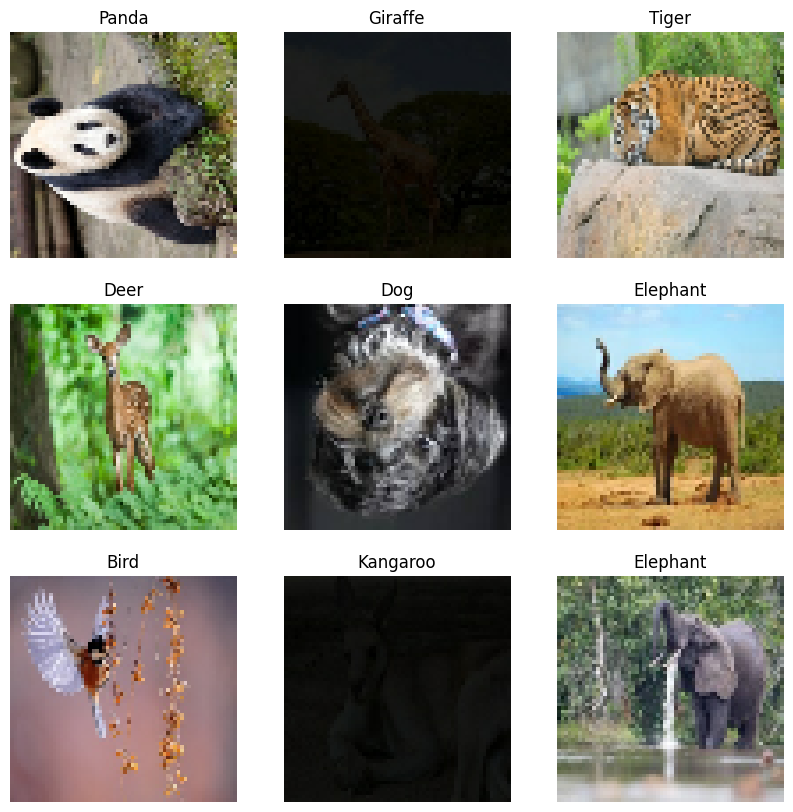

In [ ]:
#to verify wheteher the data is behaving correctly
import matplotlib.pyplot as plt
import numpy as np
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

## Freezing the layers
for layer in base_model.layers:
    layer.trainable = False

## Setting
base_model.trainable = False ## Not trainable weights

## Preprocessing input
def preprocess_image(image, label):
    """Preprocesses the image using vgg16 preprocess_input."""
    image = preprocess_input(image)  # Apply preprocessing to the image tensor
    return image, label

train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(15, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(train_ds,  epochs=50, validation_data = test_ds, batch_size=32)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step - accuracy: 0.1403 - loss: 7.3730 - val_accuracy: 0.2629 - val_loss: 2.7317
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.3634 - loss: 1.9544 - val_accuracy: 0.3505 - val_loss: 2.4277
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.5457 - loss: 1.3587 - val_accuracy: 0.4175 - val_loss: 2.2207
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.6632 - loss: 1.0029 - val_accuracy: 0.4948 - val_loss: 2.1260
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.7689 - loss: 0.7501 - val_accuracy: 0.5284 - val_loss: 2.0787
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8225 - loss: 0.5898 - val_accuracy: 0.5644 - val_loss: 2.0986
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8601 - loss: 0.4625 - val_accuracy: 0.5696 - val_loss: 2.0561
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.8911 - loss: 0.3515 - val_accuracy: 0.6057 - v

In [ ]:
#evaluating the model
model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6553 - loss: 2.8673


[3.03214168548584, 0.6804123520851135]

In [ ]:
predictions = model.predict(test_ds)
predictions[0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


array([1.0871646e-21, 1.1024656e-23, 3.3896613e-22, 9.5869844e-30,
       1.5166424e-17, 2.5381278e-23, 9.9824108e-27, 2.6681517e-19,
       9.9999994e-01, 1.6607705e-16, 2.3415230e-11, 1.3624237e-22,
       1.3435969e-35, 2.2508414e-26, 2.6713535e-16], dtype=float32)

In [ ]:
class_names[np.argmax(predictions[0])]

'Giraffe'